# Dynamic Time Warping for Non-Anthropomorphic Hand Data

In [1]:
pip install fastdtw

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ipympl 

Note: you may need to restart the kernel to use updated packages.


In [73]:
# Set up:
# %matplotlib widget
# %matplotlib inline
# %matplotlib ipympl
# %matplotlib notebook
import pandas as pd
import numpy as np

# Plotting Packages
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['figure.dpi'] = 150
savefig_options = dict(format="png", dpi=150, bbox_inches="tight")

# import plotly.graph_objects as go
# import plotly.express as px
# import ipywidgets as widget

# Computation packages
from scipy.spatial.distance import euclidean
from scipy.signal import find_peaks
from fastdtw import fastdtw

In [2]:
def dtw_data_import(robot_name, end_eff_name, PID, followup, gesture_num, demo_num):     

#     Y-position of hand and end-effector tend to be most consistently aligned. Use those to discover the time warp mapping

#     filename = "C:\\Users\\jmoln\\Documents\\Projects\\NonAnthroHands_User_Study\\data\\positions\\positions_"+str(gesture_num)+"_data\\j2s6s300_end_effectorMotion_"+str(demo_num)+".csv"
    # filename = "C:\\Users\\jmoln\\Documents\\Projects\\HandsLoggerWithURDF\\HandsLoggerWithURDF\\tempdata\\files\\"+str(robot_name)+"_PID"+str(PID)+"_"+str(end_eff_name)+"_Motion_gesture_"+str(gesture_num)+"_"+str(demo_num)+".csv"
    try:
        if followup:
            filename = "C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\Follow-up Study\\PID"+str(PID)+"B\\"+str(robot_name)+"_PID"+str(PID)+"B_"+str(end_eff_name)+"_Motion_gesture_"+str(gesture_num)+"_"+str(demo_num)+".csv"
        else: 
            filename = "C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\PID"+str(PID)+"\\"+str(robot_name)+"_PID"+str(PID)+"_"+str(end_eff_name)+"_Motion_gesture_"+str(gesture_num)+"_"+str(demo_num)+".csv"
        # print("file "+filename+" found.")
    except:
        print(filename+" NOT FOUND")
    # Import data from csvs
    end_eff_raw = pd.read_csv(filename)
    end_eff_data = end_eff_raw.to_numpy()
    
#     filename = "C:\\Users\\jmoln\\Documents\\Projects\\NonAnthroHands_User_Study\\data\\positions\\positions_"+str(gesture_num)+"_data\\RightHandAnchorMotion_"+str(demo_num)+".csv"
    # filename = "C:\\Users\\jmoln\\Documents\\Projects\\HandsLoggerWithURDF\\HandsLoggerWithURDF\\tempdata\\files\\"+str(robot_name)+"_PID"+str(PID)+"_RightHand Controller_Motion_gesture_"+str(gesture_num)+"_"+str(demo_num)+".csv"
    try:
        if followup:
            filename = "C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\Follow-up Study\\PID"+str(PID)+"B\\"+str(robot_name)+"_PID"+str(PID)+"B_RightHand Controller_Motion_gesture_"+str(gesture_num)+"_"+str(demo_num)+".csv"
        else:
            filename = "C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\PID"+str(PID)+"\\"+str(robot_name)+"_PID"+str(PID)+"_RightHand Controller_Motion_gesture_"+str(gesture_num)+"_"+str(demo_num)+".csv"
        # print("file "+filename+" found.")
    except:
        print(filename+" NOT FOUND")
    rh_raw = pd.read_csv(filename)
    rh_data = rh_raw.to_numpy()
    
    try:
        if followup:
            filename = "C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\Follow-up Study\\PID"+str(PID)+"B\\"+str(robot_name)+"_PID"+str(PID)+"B_LeftHand Controller_Motion_gesture_"+str(gesture_num)+"_"+str(demo_num)+".csv"
        else: 
            filename = "C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\PID"+str(PID)+"\\"+str(robot_name)+"_PID"+str(PID)+"_LeftHand Controller_Motion_gesture_"+str(gesture_num)+"_"+str(demo_num)+".csv"
        # print("file "+filename+" found.")
    except:
        print(filename+" NOT FOUND")
    lh_raw = pd.read_csv(filename)
    lh_data = lh_raw.to_numpy()
    
    #     filename = "C:\\Users\\jmoln\\Documents\\Projects\\NonAnthroHands_User_Study\\data\\positions\\positions_"+str(gesture_num)+"_data\\RightHandAnchorMotion_"+str(demo_num)+".csv"
    # filename = "C:\\Users\\jmoln\\Documents\\Projects\\HandsLoggerWithURDF\\HandsLoggerWithURDF\\tempdata\\files\\"+str(robot_name)+"_PID"+str(PID)+"_Main Camera_Motion_gesture_"+str(gesture_num)+"_"+str(demo_num)+".csv"
    try: 
        if followup:
            filename = "C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\Follow-up Study\\PID"+str(PID)+"B\\"+str(robot_name)+"_PID"+str(PID)+"B_Main Camera_Motion_gesture_"+str(gesture_num)+"_"+str(demo_num)+".csv"
        else: 
            filename = "C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\PID"+str(PID)+"\\"+str(robot_name)+"_PID"+str(PID)+"_Main Camera_Motion_gesture_"+str(gesture_num)+"_"+str(demo_num)+".csv"
        # print("file "+filename+" found.")
    except:
        print(filename+" NOT FOUND")
    camera_raw = pd.read_csv(filename)
    camera_data = camera_raw.to_numpy()
    
#     filename = "C:\\Users\\jmoln\\Documents\\Projects\\NonAnthroHands_User_Study\\data\\positions\\positions_"+str(gesture_num)+"_data\\j2s6s300_JointMotion_"+str(demo_num)+".csv"
    # filename = "C:\\Users\\jmoln\\Documents\\Projects\\HandsLoggerWithURDF\\HandsLoggerWithURDF\\tempdata\\files\\"+str(robot_name)+"_PID"+str(PID)+"_JointMotion_gesture_"+str(gesture_num)+"_"+str(demo_num)+".csv"
    try:
        if followup:
            filename = "C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\Follow-up Study\\PID"+str(PID)+"B\\"+str(robot_name)+"_PID"+str(PID)+"B_JointMotion_gesture_"+str(gesture_num)+"_"+str(demo_num)+".csv"
            jointangles = pd.read_csv(filename)
            joint_data = jointangles.to_numpy()
        else: 
            filename = "C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\PID"+str(PID)+"\\"+str(robot_name)+"_PID"+str(PID)+"_JointMotion_gesture_"+str(gesture_num)+"_"+str(demo_num)+".csv"
            jointangles = pd.read_csv(filename)
            joint_data = jointangles.to_numpy()
        # print("file "+filename+" found.")
    except:
        print("file "+filename+" not found.")
        if followup:
            PID_temp=9
            try:
                filename = "C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\Follow-up Study\\PID"+str(PID_temp)+"B\\"+str(robot_name)+"_PID"+str(PID_temp)+"B_JointMotion_gesture_"+str(gesture_num)+"_"+str(demo_num)+".csv"
                jointangles = pd.read_csv(filename)
                joint_data = jointangles.to_numpy()
            except:
                print("ERROR: JointMotion file not found. Backup JointMotion file not found.")
        else:
            PID_temp=3
            try: 
                filename = "C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\PID"+str(PID_temp)+"\\"+str(robot_name)+"_PID"+str(PID_temp)+"_JointMotion_gesture_"+str(gesture_num)+"_"+str(demo_num)+".csv"
                jointangles = pd.read_csv(filename)
                joint_data = jointangles.to_numpy()
            except:
                print("ERROR: JointMotion file not found. Backup JointMotion file not found.")
                    
        print("Using PID "+str(PID_temp)+" instead")
        # If JointMotion data is missing, the good news is that it should be the same for all participants. 
        #  Try to find a participant/demo that exists, and copy that over instead.
        # NOTE that time increments may be different for JointMotions vs all other data timestamps because of 
        #  this. The start time should be identical, though, and the overall time as well
        # (I prefer to have the code do this for me, rather than keeping track of which PIDs I had to adjust manually)
    

    return end_eff_data, camera_data, rh_data, lh_data, joint_data

#Test:
# robot_name = "j2s6s300"
# end_eff_name = "j2s6s300_end_effector"
# PID = 8
# gesture_num = 2
# demo_num = 3
# dtw_data_import(robot_name, end_eff_name, PID, True, gesture_num, demo_num)

In [306]:
def norm_data(x,y):

    # Separate time from position
    # x = (end_eff_data[...,0],end_eff_data[...,1])
    # y = (hand_data[...,0],hand_data[...,1])
    
    
    # Normalize x and y to prevent scaling issues from creating DTW misalignment

    scale_x = 1/(np.max(x[1])-np.min(x[1]))
    scale_y = 1/(np.max(y[1])-np.min(y[1]))
    
    # Center should not be the mean; it should center based on the max and min
    # center_x = np.mean(x[1])
    # center_y = np.mean(y[1])
    center_x = np.min(x[1])
    center_y = np.min(y[1])

    x_norm = np.vstack((x[0],(x[1] - center_x)*scale_x))
    y_norm = np.vstack((y[0],(y[1] - center_y)*scale_y))

    # TO-DO: trim ends for cleaner DTW
    # (Not done yet)
    
    # If X and Y are different lengths, fastdtw has issues
    lim = min(x.shape[1],y.shape[1])

    dtw_distance, warp_path = fastdtw(x_norm[1,0:lim], y_norm[1,0:lim]) #, dist=euclidean) 
    plot_norm(warp_path, x_norm, y_norm)
    # dtw_distance, warp_path = fastdtw(x[1,0:lim], y[1,0:lim])
    # plot_norm(warp_path, x,y)
    
    return warp_path

In [307]:
def plot_norm(warp_path, x_norm, y_norm):
    # Show normalized plots
    fig, ax = plt.subplots(figsize=(12, 6))

    # Remove the border and axes ticks
    fig.patch.set_visible(True)
    ax.axis('on')

    max_distance = 0;
    i = 0;

    for [map_x, map_y] in warp_path:

        ax.plot([map_x, map_y], [x_norm[1][map_x], y_norm[1][map_y]], '--k', linewidth=0.2)
        temp_arr2 = np.array((x_norm[1][map_x], y_norm[1][map_y]))
        max_distance = np.maximum(max_distance, np.linalg.norm(temp_arr2))
        i=i+1


    ax.plot(x_norm[1][:], '-ro', label='x', linewidth=0.2, markersize=2, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
    ax.plot(y_norm[1][:], '-bo', label='y', linewidth=0.2, markersize=2, markerfacecolor='skyblue', markeredgecolor='skyblue')

    ax.set_title("Normalized DTW Distance", fontsize=10, fontweight="bold")
    # plt.savefig('NormDTW_Y_PID'+str(PID)+"_gesture"+str(gesture_num)+'_'+str(demo_num)+'.png')
    plt.savefig('NormDTW_temp.png')
    # plt.close('all')
    
    return

In [5]:
# Take the warp_path generated from normalized hand/URDF data and use that to align all other hand data
def full_align(warp_path, end_eff_data, hand_data):
    # Time marks: 
    time_URDF = end_eff_data[...,0]
    time_hand = hand_data[...,0]

    # remember that x = end_eff_pos
    #               y = hand_pos

    # Z-data (forward/back) is offset by the distance between the viewer and the robot. Let's remove that distance for comparison purposes

    wp_size = len(warp_path)
    time_URDF_aligned = np.zeros(wp_size)
    time_hand_aligned = np.zeros(wp_size)
    end_eff_pos_aligned = np.zeros((wp_size,3))
    end_eff_rot_aligned = np.zeros((wp_size,3))
    hand_pos_aligned = np.zeros((wp_size,3))
    hand_rot_aligned = np.zeros((wp_size,3))

    for i, [map_x, map_y] in enumerate(warp_path, start=0):   
        time_URDF_aligned[i] = time_URDF[map_x]
        time_hand_aligned[i] = time_hand[map_y]
        end_eff_pos_aligned[i][0:3] = end_eff_data[map_x][1:4]
        end_eff_rot_aligned[i][0:3] = end_eff_data[map_x][4:]
        hand_pos_aligned[i][0:3]    = hand_data[map_y][1:4]
        hand_rot_aligned[i][0:3]    = hand_data[map_y][4:]
    
    return time_URDF_aligned, time_hand_aligned, end_eff_pos_aligned, end_eff_rot_aligned, hand_pos_aligned, hand_rot_aligned

def full_joint_align(time_URDF_aligned, joint_data):
    # Time marks: 
    time_ja   = joint_data[...,0]

    # remember that x = end_eff_pos
    #               y = hand_pos

    # Z-data (forward/back) is offset by the distance between the viewer and the robot. Let's remove that distance for comparison purposes

    wp_size = len(warp_path)
    time_ja_aligned   = np.zeros(wp_size)
    joint_data_aligned = np.zeros((wp_size,6))

    for i, [map_x, map_y] in enumerate(warp_path, start=0):   
        time_ja_aligned[i]   = time_ja[map_x]
        time_hand_aligned[i] = time_hand[map_y]
        joint_data_aligned[i][0:5] = end_eff_data[map_x][1:6]
        hand_data_aligned[i][0:5]    = hand_data[map_y][1:6]
    
    return time_ja_aligned, joint_data_aligned

In [6]:
def plot_pos(gesture_num, demo_num, warp_path, end_eff_pos_aligned, hand_pos_aligned):
    fig, ax = plt.subplots(figsize=(15, 10))

    # Show the border and axes ticks,
    fig.patch.set_visible(True)
    ax.axis('on')
    ax = plt.axes(projection='3d')
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='z', labelsize=10)

    
    
    end_eff_pos_aligned = end_eff_pos_aligned - end_eff_pos_aligned[1]
    hand_pos_aligned = hand_pos_aligned - hand_pos_aligned[1]

    # ax.plot(time_URDF_aligned, end_eff_pos_aligned[:].T[0], '-ro', label='End-effector position', \
    #     linewidth=0.2, markersize=2, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
    # ax.plot(time_URDF_aligned, end_eff_pos_aligned[:].T[1], '-ro', label='End-effector position', \
    #     linewidth=0.2, markersize=2, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
    # ax.plot(time_URDF_aligned, end_eff_pos_aligned[:].T[2], '-ro', label='End-effector position', \
    #     linewidth=0.2, markersize=2, markerfacecolor='lightcoral', markeredgecolor='lightcoral')

    # Unity uses a left-handed coordinate system, so plot your position data in the orientation in which it was gathered:
    #  X moving left to right, Z moving front to back, and Y pointing up and down
    ax.scatter(end_eff_pos_aligned[:].T[0], -end_eff_pos_aligned[:].T[2], end_eff_pos_aligned[:].T[1], \
                c=time_URDF_aligned/max(time_URDF_aligned), cmap='Reds', label='End-effector position')
    ax.scatter(hand_pos_aligned[:].T[0]   , -hand_pos_aligned[:].T[2]   , hand_pos_aligned[:].T[1]   , \
               c=time_hand_aligned/max(time_hand_aligned), cmap='Blues', label='Hand position')

    # ax.plot3D(end_eff_pos_aligned[:].T[0], end_eff_pos_aligned[:].T[1], end_eff_pos_aligned[:].T[2], \
    #     '-ro', label='End-effector position', linewidth=0.2, markersize=2, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
    # ax.plot3D(hand_pos_aligned[:].T[0]   , hand_pos_aligned[:].T[1]   , hand_pos_aligned[:].T[2]   , \
    #     '-bo', label='Hand position', linewidth=0.2, markersize=2, markerfacecolor='skyblue', markeredgecolor='skyblue')

    for [map_x, map_y] in warp_path: 
        ax.plot3D([end_eff_pos_aligned[map_x].T[0], hand_pos_aligned[map_y].T[0]], \
                  [-end_eff_pos_aligned[map_x].T[2], -hand_pos_aligned[map_y].T[2]],\
                  [end_eff_pos_aligned[map_x].T[1], hand_pos_aligned[map_y].T[1]], \
                  '--k', linewidth=0.2)

    ax.set_xlabel('Horizontal position (m)',fontsize=16)
    ax.set_ylabel('Forward/Back position (m)',fontsize=16)
    ax.set_zlabel('Vertical position (m)',fontsize=16)
    ax.legend(loc='lower right',fontsize=14)

    ax.set_title("DTW Alignment of Hand and URDF End-Effector Position", fontsize=18, fontweight="bold")
    plt.savefig('DTW_Pos'+str(demo_num)+'.png')
    plt.close('all')
    
    return

In [7]:
def clean_rot_data(gesture_num, demo_num, hand_rot_aligned):
    # Fix angle inversion issues for hand data

    fig, ax = plt.subplots(figsize=(10, 7))

    for i, [x_rot,y_rot,z_rot] in enumerate(hand_rot_aligned, start=1):
        # Singularities should occur in all axes simultaneously
        if i==len(hand_rot_aligned):
            continue
        elif np.abs(hand_rot_aligned[i].T[0] - hand_rot_aligned[i-1].T[0])>np.abs(hand_rot_aligned[i].T[0] + hand_rot_aligned[i-1].T[0]):
    #         print(time_hand_aligned[i], hand_rot_aligned[i-1], hand_rot_aligned[i])
            hand_rot_aligned[i] = -hand_rot_aligned[i]
        elif np.abs(hand_rot_aligned[i].T[1] - hand_rot_aligned[i-1].T[1])>np.abs(hand_rot_aligned[i].T[1] + hand_rot_aligned[i-1].T[1]):
    #         print(time_hand_aligned[i], hand_rot_aligned[i-1], hand_rot_aligned[i])
            hand_rot_aligned[i] = -hand_rot_aligned[i]
        elif np.abs(hand_rot_aligned[i].T[2] - hand_rot_aligned[i-1].T[2])>np.abs(hand_rot_aligned[i].T[2] + hand_rot_aligned[i-1].T[2]):
    #         print(time_hand_aligned[i], hand_rot_aligned[i-1], hand_rot_aligned[i])
            hand_rot_aligned[i] = -hand_rot_aligned[i]


    # for i, [x_rot,y_rot,z_rot] in enumerate(hand_rot_aligned, start=2):
    #     # Singularities should occur in all axes simultaneously
    #     if np.abs(hand_rot_aligned[i].T[0] - hand_rot_aligned[i-2].T[0])>np.abs(hand_rot_aligned[i].T[0] + hand_rot_aligned[i-2].T[0]):
    #         print(time_hand_aligned[i], hand_rot_aligned[i-2], hand_rot_aligned[i])
    #         hand_rot_aligned[i] = -hand_rot_aligned[i]
    #     elif np.abs(hand_rot_aligned[i].T[1] - hand_rot_aligned[i-2].T[1])>np.abs(hand_rot_aligned[i].T[1] + hand_rot_aligned[i-2].T[1]):
    #         print(time_hand_aligned[i], hand_rot_aligned[i-2], hand_rot_aligned[i])
    #         hand_rot_aligned[i] = -hand_rot_aligned[i]
    #     elif np.abs(hand_rot_aligned[i].T[2] - hand_rot_aligned[i-2].T[2])>np.abs(hand_rot_aligned[i].T[2] + hand_rot_aligned[i-2].T[2]):
    #         print(time_hand_aligned[i], hand_rot_aligned[i-2], hand_rot_aligned[i])
    #         hand_rot_aligned[i] = -hand_rot_aligned[i]

    ax.plot(time_hand_aligned, hand_rot_aligned[:].T[0], '-ko', label='x', linewidth=0.2, markersize=2, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
    ax.plot(time_hand_aligned, hand_rot_aligned[:].T[1], '-bo', label='x', linewidth=0.2, markersize=2, markerfacecolor='skyblue', markeredgecolor='skyblue')
    ax.plot(time_hand_aligned, hand_rot_aligned[:].T[2], '-ro', label='x', linewidth=0.2, markersize=2, markerfacecolor='red', markeredgecolor='red')

    plt.savefig('DTW_Rot_corrected_'+str(demo_num)+'.png')
    plt.close('all')
    
    return hand_rot_aligned

In [8]:
def plot_rot(gesture_num, demo_num, warp_path, end_eff_rot_aligned, hand_rot_aligned):
    # Plot DTW-aligned hand/end-effector orientation

    fig, ax = plt.subplots(figsize=(15, 10))

    # Show the border and axes ticks
    fig.patch.set_visible(True)
    ax.axis('on')

    ax = plt.axes(projection='3d')

    ax.scatter(end_eff_rot_aligned[:].T[0], -end_eff_rot_aligned[:].T[2], end_eff_rot_aligned[:].T[1], \
              c=time_URDF_aligned/max(time_URDF_aligned), cmap='Reds', label='End-effector orientation')
    ax.scatter(hand_rot_aligned[:].T[0]   , -hand_rot_aligned[:].T[2]   , hand_rot_aligned[:].T[1]   , \
              c=time_hand_aligned/max(time_hand_aligned), cmap='Blues', label='Hand orientation')

    for [map_x, map_y] in warp_path: 
        ax.plot3D([end_eff_rot_aligned[map_x].T[0], hand_rot_aligned[map_y].T[0]], \
                  [-end_eff_rot_aligned[map_x].T[2], -hand_rot_aligned[map_y].T[2]],\
                  [end_eff_rot_aligned[map_x].T[1], hand_rot_aligned[map_y].T[1]], \
                  '--k', linewidth=0.2)

    ax.set_title("DTW Alignment of Hand and URDF End-Effector Orientation", fontsize=20, fontweight="bold")
    plt.savefig('DTW_Rot'+str(demo_num)+'.png')
    plt.close('all')
    
    return

In [22]:
def plot_raw_data(end_eff_data, rh_data, lh_data, camera_data, joint_data):
    
        #     # Quick and dirty clipping (should be done by DTW instead)
    time = end_eff_data[...,0]
        # start_index = np.where(time>time[0]+1)[0][0]
        # end_index   = np.where(time>time[-1]-1)[0][0]
    
    fig, ax = plt.subplots(figsize=(12,16))
    fig.patch.set_visible(True)
    ax.axis('off')
    ax = plt.axes(projection='3d')  
    ax.view_init(30,60)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ax.set_xlim(-.5,.5)
    ax.set_ylim(-.25,.75)
    ax.set_zlim(-.5,.5)
    
    centered_rh_data     = rh_data - camera_data
    centered_lh_data     = lh_data - camera_data
    centered_camera_data = camera_data - camera_data
    
    centered_rh_data     = centered_rh_data[start_index:end_index,:]
    centered_lh_data     = centered_lh_data[start_index:end_index,:]
    centered_camera_data = centered_camera_data[start_index:end_index,:]
    
    # Ideally, also need to normalize by participant height (wingspan)
    # And clip ends (~1sec at beginning, 2sec at end (but DTW should help with this))
    # np.where(time_hand_aligned>time_hand_aligned[0]+1)[0][0]
    
    
#     ax.scatter(rh_data[:].T[1], rh_data[:].T[2], -rh_data[:].T[3],\
#                 c=time/max(time), cmap='Reds', label='Right-hand position')
#     ax.scatter(lh_data[:].T[1], lh_data[:].T[2], -lh_data[:].T[3], \
#                c=time/max(time), cmap='Blues', label='Left-hand position')
#     ax.scatter(camera_data[:].T[1], camera_data[:].T[2], -camera_data[:].T[3], \
#                c=time/max(time), cmap='Greens', label='Camera position')

    ax.scatter(centered_rh_data[:].T[1], centered_rh_data[:].T[3], centered_rh_data[:].T[2], \
                c=time[start_index:end_index]/max(time), cmap='Reds', label='Right-hand position')
    ax.scatter(centered_lh_data[:].T[1], centered_lh_data[:].T[3], centered_lh_data[:].T[2],\
               c=time[start_index:end_index]/max(time), cmap='Blues', label='Left-hand position')
    ax.scatter(centered_camera_data[:].T[1], centered_camera_data[:].T[3], centered_camera_data[:].T[2],\
               c=time[start_index:end_index]/max(time), cmap='Greens', label='Camera position')
    
    ax.legend()
    
def plot_raw_data_subsampled(subsample, end_eff_data, camera_data, rh_data, lh_data, joint_data):
    
        #     # Quick and dirty clipping (should be done by DTW instead)
    time = end_eff_data[...,0]
        # start_index = np.where(time>time[0]+1)[0][0]
        # end_index   = np.where(time>time[-1]-1)[0][0]
        
    start_index = 1 #77
    end_index = -1 #-154
    
    fig, ax = plt.subplots(figsize=(12,16))
    fig.patch.set_visible(True)
    ax.axis('off')
    ax = plt.axes(projection='3d')  
    ax.view_init(30,60)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # ax.set_xlim(-.5,.5)
    # ax.set_ylim(-.25,.75)
    # ax.set_zlim(-.5,.5)
    
    centered_rh_data     = rh_data - camera_data
    centered_lh_data     = lh_data - camera_data
    centered_camera_data = camera_data - camera_data
    
    centered_rh_data     = centered_rh_data[start_index:end_index:subsample,:]
    centered_lh_data     = centered_lh_data[start_index:end_index:subsample,:]
    centered_camera_data = centered_camera_data[start_index:end_index:subsample,:]
    
    #End eff data is not centered, but merely subsampled:
    centered_end_eff_data = end_eff_data[start_index:end_index:subsample,:]
    
    
    # Ideally, also need to normalize by participant height (wingspan)
    # And clip ends (~1sec at beginning, 2sec at end (but DTW should help with this))
    # np.where(time_hand_aligned>time_hand_aligned[0]+1)[0][0]
    
    
#     ax.scatter(rh_data[:].T[1], rh_data[:].T[2], -rh_data[:].T[3],\
#                 c=time/max(time), cmap='Reds', label='Right-hand position')
#     ax.scatter(lh_data[:].T[1], lh_data[:].T[2], -lh_data[:].T[3], \
#                c=time/max(time), cmap='Blues', label='Left-hand position')
#     ax.scatter(camera_data[:].T[1], camera_data[:].T[2], -camera_data[:].T[3], \
#                c=time/max(time), cmap='Greens', label='Camera position')

    ax.scatter(centered_rh_data[:].T[1], centered_rh_data[:].T[3], centered_rh_data[:].T[2], \
                c=time[start_index:end_index:subsample]/max(time), cmap='Reds', label='Right-hand position')
    ax.scatter(centered_lh_data[:].T[1], centered_lh_data[:].T[3], centered_lh_data[:].T[2],\
               c=time[start_index:end_index:subsample]/max(time), cmap='Blues', label='Left-hand position')
    ax.scatter(centered_camera_data[:].T[1], centered_camera_data[:].T[3], centered_camera_data[:].T[2],\
               c=time[start_index:end_index:subsample]/max(time), cmap='Greens', label='Camera position')
    ax.scatter(centered_end_eff_data[:].T[1], centered_end_eff_data[:].T[3], centered_end_eff_data[:].T[2],\
               c=time[start_index:end_index:subsample]/max(time), cmap='Purples', label='End-effector position')

        
    # ax.plot(centered_rh_data[:].T[1], centered_rh_data[:].T[3], centered_rh_data[:].T[2])
    # ax.plot(centered_lh_data[:].T[1], centered_lh_data[:].T[3], centered_lh_data[:].T[2])
    # ax.plot(centered_camera_data[:].T[1], centered_camera_data[:].T[3], centered_camera_data[:].T[2])
    
    ax.legend()

In [30]:
def load_npzs(robot_name, PID, followup, gesture_num):
    try:
        if followup:
            filename = "C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\npz files\\data_PID"+str(PID)+"B_"+str(robot_name)+"_gesture_"+str(gesture_num)+".npz"
        else:
            filename = "C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\npz files\\data_PID"+str(PID)+"_"+str(robot_name)+"_gesture_"+str(gesture_num)+".npz"
    except:
        print(filename+" NOT FOUND")
    # Import data from csvs
    data = np.load(filename)
    end_eff_data = data['end_eff_data']
    camera_data  = data['camera_data']
    rh_data      = data['rh_data']
    lh_data      = data['lh_data']
    joint_data   = data['joint_data']
    
    return end_eff_data, camera_data, rh_data, lh_data, joint_data

In [15]:
# Functions are all defined. Let's grab some data sets and get them ordered

robot_name = "Reachy"
end_eff_name = "r_wrist2hand"

robot_name = "j2s6s300"
end_eff_name = "j2s6s300_end_effector"


total_end_eff_data = np.array([])
total_camera_data  = np.array([])
total_rh_data      = np.array([])
total_lh_data      = np.array([])
total_joint_data   = np.array([])

start_index = 1 #77
end_index = -1 #-154
# start_index = 77
# end_index = -154

followup = False

if followup:
    PIDmax=10
    gesturemax = 7
else:
    PIDmax=17
    gesturemax=16

gest_target = 1
   

for PID in range(1,PIDmax):
    
    for gesture_num in range(1,gesturemax):
    # for gesture_num in range(gest_target,gest_target+1):
    #     print(gesture_num)
        demo_num=1

        print(PID, gesture_num, demo_num)

        #Normalize by participant height

        for demo_num in range(1,6): # Change this to include all demos that exist (and possibly exclude individual ones)
            # print(gesture_num, demo_num)
            
            # LIST OF OVERRIDES:
            # These are robots/participants that had erroneous or incomplete data. Two cases exist:
            #  1) The user recorded a demo that they later wished to replace with an extra recording. 
            #     The robot, PID, and gesture to omit/gesture to replace must be specified.
            #     The easy way to do this would be to just grab the last five demos for each gesture,
            #     but that's not 100% accurate. It was not always the first demo that was the mess-up.
            #  2) The robot spazzed out and the user was unable to finish all gestures or motions. 
            #     I don't think we can account for that here; I think this will affect clustering, workspace 
            #     coverage, and metrics of user consistency, but that's going to show up later.
            
            if followup:                
                if robot_name[1]=='R':
                    if PID==2:
                        demo_num=demo_num+10  #PID2 went through many motions before 
                else if robot_name[1]=='j':

            try:
                end_eff_data_temp, camera_data_temp, rh_data_temp, lh_data_temp, joint_data_temp = dtw_data_import(robot_name,end_eff_name, PID, followup, gesture_num, demo_num)
                end_eff_data_temp[:,0] = end_eff_data_temp[:,0]-end_eff_data_temp[0,0]
                camera_data_temp[:,0]  = camera_data_temp[:,0]-camera_data_temp[0,0]
                rh_data_temp[:,0]      = rh_data_temp[:,0]-rh_data_temp[0,0]
                lh_data_temp[:,0]      = lh_data_temp[:,0]-lh_data_temp[0,0]
                joint_data_temp[:,0]   = joint_data_temp[:,0]-joint_data_temp[0,0]
                
                end_eff_data_temp = end_eff_data_temp[start_index:end_index,:]
                camera_data_temp  = camera_data_temp[start_index:end_index,:]
                rh_data_temp      = rh_data_temp[start_index:end_index,:]
                lh_data_temp      = lh_data_temp[start_index:end_index,:]
                joint_data_temp   = joint_data_temp[start_index:end_index,:]
                
                # Normalize by participant wingspan
                # ...
                
            except:
                print("Import data failed")
            try:
                if (demo_num==1):
                    end_eff_data = end_eff_data_temp
                    camera_data  = camera_data_temp
                    rh_data      = rh_data_temp
                    lh_data      = lh_data_temp
                    joint_data   = joint_data_temp
                else:   
                    end_eff_data = np.vstack((end_eff_data, end_eff_data_temp))
                    camera_data  = np.vstack((camera_data, camera_data_temp))
                    rh_data      = np.vstack((rh_data, rh_data_temp))
                    lh_data      = np.vstack((lh_data, lh_data_temp))
                    joint_data  = np.vstack((joint_data, joint_data_temp))
            except:
                print("Stacking data for demo "+str(demo_num)+" failed")
    
            try:
                # np.savez('data\\npz files\\data_PID'+str(PID)+"_"+str(robot_name)+"_gesture_"+str(gesture_num)+'_'+str(demo_num),time_URDF_aligned=time_URDF_aligned, time_hand_aligned=time_hand_aligned,\
                #         end_eff_pos_aligned=end_eff_pos_aligned, end_eff_rot_aligned=end_eff_rot_aligned, \
                #         hand_pos_aligned=hand_pos_aligned, hand_rot_aligned=hand_rot_aligned, \
                #         camera_data = camera_data, \
                #         gesture_num=gesture_num, demo_num=demo_num, warp_path=warp_path, end_eff_data=end_eff_data, hand_data=hand_data)
                if followup:
                    np.savez('C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\npz files\\data_PID'+str(PID)+"B_"+str(robot_name)+"_gesture_"+str(gesture_num),\
                             end_eff_data=end_eff_data,rh_data=rh_data,lh_data=lh_data,\
                             camera_data=camera_data,joint_data=joint_data)
                else:
                    np.savez('C:\\Users\\jmoln\\Dropbox (GaTech)\\Non-Anthropomorphic Hands User Study Data\\npz files\\data_PID'+str(PID)+"_"+str(robot_name)+"_gesture_"+str(gesture_num),\
                             end_eff_data=end_eff_data,rh_data=rh_data,lh_data=lh_data,\
                             camera_data=camera_data,joint_data=joint_data)
   
            except: 
                print("Save data failed")

        try:    
            if ((PID==1) & (gesture_num==gest_target)):
                total_end_eff_data = end_eff_data
                total_camera_data = camera_data
                total_rh_data     = rh_data
                total_lh_data     = lh_data
                total_joint_data  = joint_data
            else:
                total_end_eff_data = np.vstack((total_end_eff_data,end_eff_data))
                total_camera_data  = np.vstack((total_camera_data,camera_data))
                total_rh_data      = np.vstack((total_rh_data,rh_data))
                total_lh_data      = np.vstack((total_lh_data,lh_data))
                total_joint_data   = np.vstack((total_joint_data,joint_data))
        except:
            print("Data was missing from PID"+str(PID)+" gesture "+str(gesture_num))

# plot_raw_data(total_end_eff_data, total_rh_data, total_lh_data, total_camera_data, total_joint_data)

1 1 1
1 2 1
file C:\Users\jmoln\Dropbox (GaTech)\Non-Anthropomorphic Hands User Study Data\Follow-up Study\PID1B\j2s6s300_PID1B_JointMotion_gesture_2_1.csv not found.
Using PID 9 instead
file C:\Users\jmoln\Dropbox (GaTech)\Non-Anthropomorphic Hands User Study Data\Follow-up Study\PID1B\j2s6s300_PID1B_JointMotion_gesture_2_2.csv not found.
Using PID 9 instead
file C:\Users\jmoln\Dropbox (GaTech)\Non-Anthropomorphic Hands User Study Data\Follow-up Study\PID1B\j2s6s300_PID1B_JointMotion_gesture_2_3.csv not found.
Using PID 9 instead
file C:\Users\jmoln\Dropbox (GaTech)\Non-Anthropomorphic Hands User Study Data\Follow-up Study\PID1B\j2s6s300_PID1B_JointMotion_gesture_2_4.csv not found.
Using PID 9 instead
file C:\Users\jmoln\Dropbox (GaTech)\Non-Anthropomorphic Hands User Study Data\Follow-up Study\PID1B\j2s6s300_PID1B_JointMotion_gesture_2_5.csv not found.
Using PID 9 instead
1 3 1
file C:\Users\jmoln\Dropbox (GaTech)\Non-Anthropomorphic Hands User Study Data\Follow-up Study\PID1B\j2s6s3

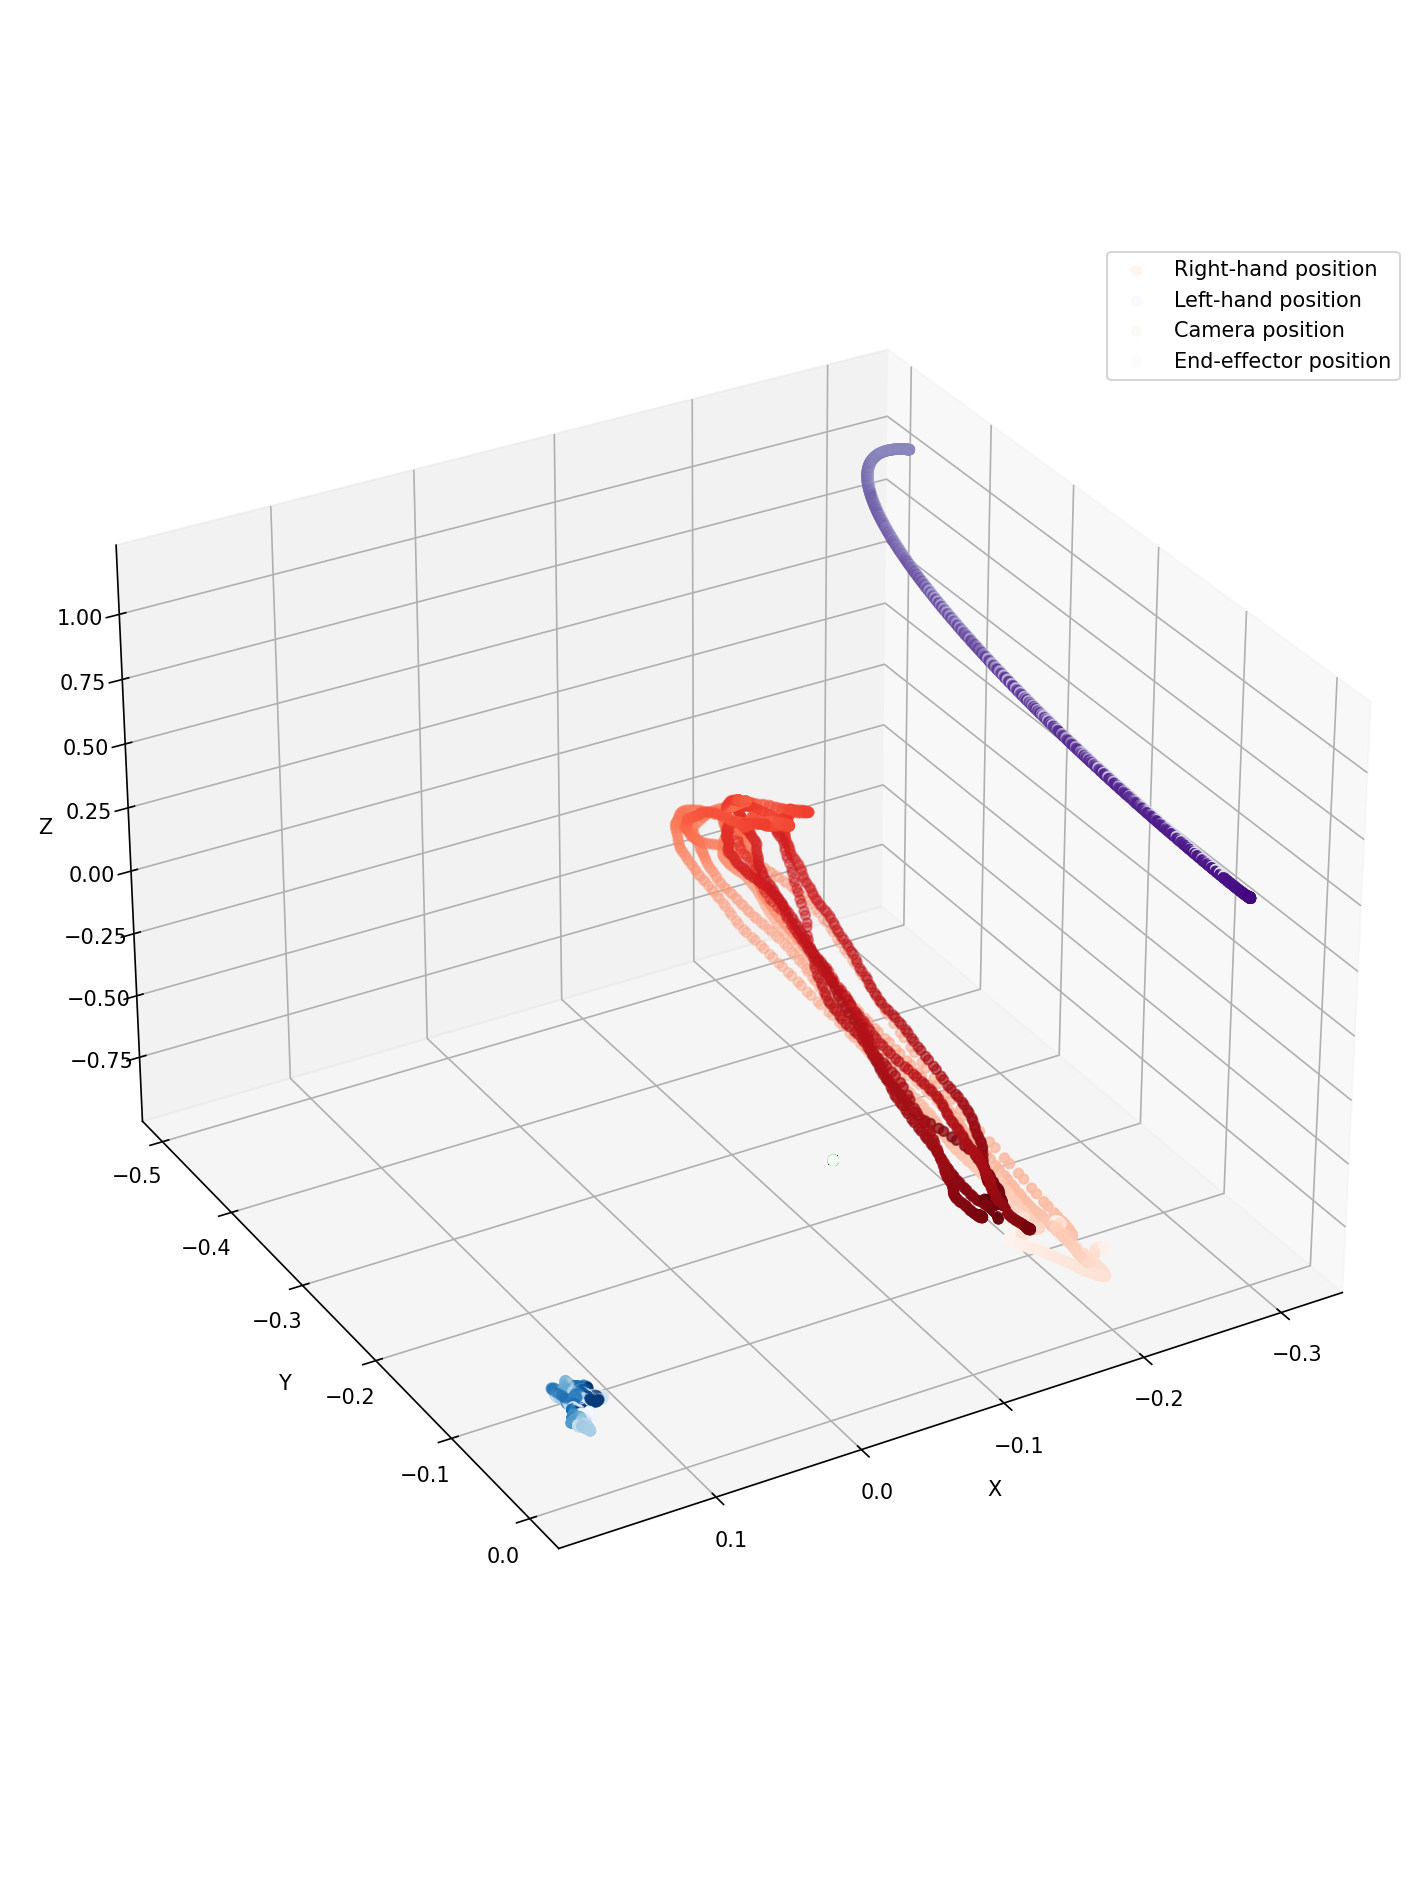

In [29]:
# robot_name='j2s6s300'
robot_name='Reachy'
gesture_num=1


total_end_eff = np.array([])
total_camera  = np.array([])
total_rh      = np.array([])
total_lh      = np.array([])
total_joint   = np.array([])

singlePID=True
singlePIDval = 13
followup = False

if singlePID:
    PID_begin_range=singlePIDval
    PID_end_range=singlePIDval+1 #Don't forget to +1 to whatever your last PID is
else:
    PID_begin_range=1
    if followup:
        PID_end_range=10 #Don't forget to +1 to whatever your last PID is
    else:
        PID_end_range=17
for PID in range(PID_begin_range,PID_end_range):
    end_eff, camera, rh, lh, joint = load_npzs(robot_name, PID, followup, gesture_num)
    if (PID==PID_begin_range):
        total_end_eff = end_eff
        total_camera = camera
        total_rh = rh
        total_lh = lh
        total_joint = joint
    else:
        total_end_eff = np.vstack((total_end_eff,end_eff))
        total_camera  = np.vstack((total_camera,camera))
        total_rh      = np.vstack((total_rh,rh))
        total_lh      = np.vstack((total_lh,lh))
        total_joint   = np.vstack((total_joint,joint))
# plot_raw_data(end_eff, camera, rh, lh, joint)
plot_raw_data_subsampled(1, total_end_eff, total_camera, total_rh, total_lh, total_joint)


In [311]:
end_eff_data, camera_data, rh_data, lh_data, joint_data = load_npzs(robot_name, PID, followup, gesture_num)

demo_max=2

def segmentbydemo(end_eff_data, camera_data, rh_data, lh_data, joint_data, demo_max):    
    end_eff=['']*demo_max
    camera =['']*demo_max
    rh     =['']*demo_max
    lh     =['']*demo_max
    joints =['']*demo_max

    for i in range(0,demo_max):
        if i==0:
            end_eff[i] = end_eff_data[1:peaks[0],:]
            camera[i]  =  camera_data[1:peaks[0],:]
            rh[i]      =      rh_data[1:peaks[0],:]
            lh[i]      =      lh_data[1:peaks[0],:]
            joints[i]  =   joint_data[1:peaks[0],:]
        else:
            end_eff[i] = end_eff_data[peaks[i-1]:peaks[i],:]
            camera[i]  =  camera_data[peaks[i-1]:peaks[i],:]
            rh[i]      =      rh_data[peaks[i-1]:peaks[i],:]
            lh[i]      =      lh_data[peaks[i-1]:peaks[i],:]
            joints[i]  =   joint_data[peaks[i-1]:peaks[i],:]

    # end_eff = np.array(end_eff)
    # rh      = np.array(rh)
    # lh      = np.array(lh)
    # joints  = np.array(joints)
    return end_eff, camera, rh, lh, joints

def sumofsquares(a):
    return np.vstack((a[:,0],np.sum(np.multiply(a[:,1:7],a[:,1:7]),axis=1)))

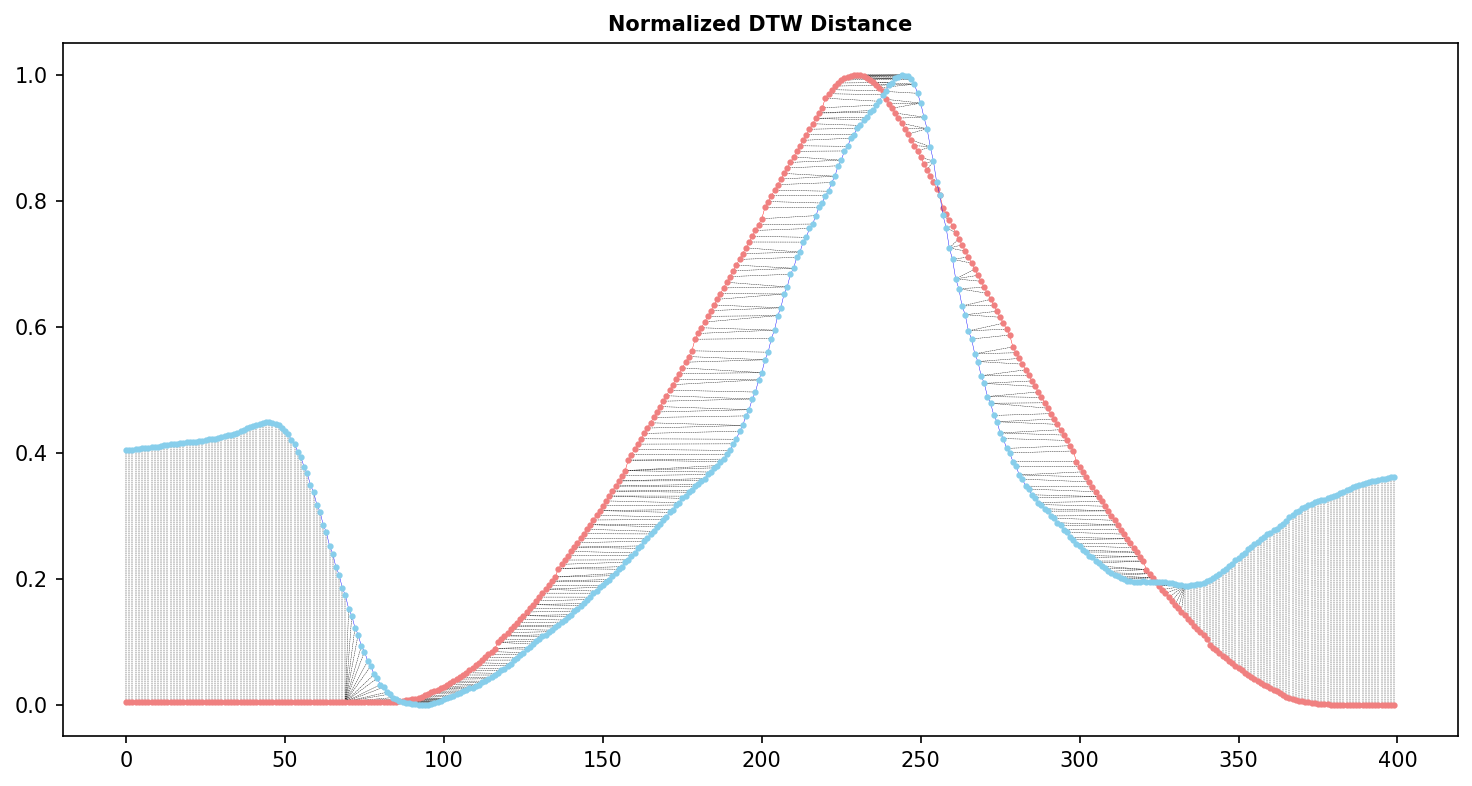

In [312]:
## SCRATCHPAD STUFF BEGINS HERE

end_eff, camera, rh, lh, joints = segmentbydemo(end_eff_data, camera_data, rh_data, lh_data, joint_data, demo_max)
# end_eff = np.array(end_eff)
# temp = norm_data(sumofsquares(rh[0]),sumofsquares(rh[1]))
# temp = norm_data(sumofsquares(end_eff[0]),sumofsquares(end_eff[1]))
temp = norm_data(sumofsquares(end_eff[0]),sumofsquares(rh[0]))
    # ax.set_title("DTW Alignment of Hand and URDF End-Effector Orientation", fontsize=20, fontweight="bold")
# plt.savefig('DTW_UnitTest.png')
    # plt.close('all')

In [290]:
end_eff[2].shape

IndexError: list index out of range

In [13]:
try:
    warp_path = norm_data(sumofsquares(end_eff,0), sumofsquares(end_eff,1))
except:
    print("Warp data failed")
try:
    time_URDF_aligned, time_hand_aligned, end_eff_pos_aligned, end_eff_rot_aligned, hand_pos_aligned, hand_rot_aligned = \
        full_align(warp_path, end_eff_data, hand_data)
    hand_rot_aligned = clean_rot_data(gesture_num, demo_num, hand_rot_aligned)
    hand_rot_aligned = clean_rot_data(gesture_num, demo_num, hand_rot_aligned) #Seems to work better if you do it twice for some reason
except:
    print("Align data failed")
try:
    plot_pos(gesture_num, demo_num, warp_path, end_eff_pos_aligned, hand_pos_aligned)
    plot_rot(gesture_num, demo_num, warp_path, end_eff_rot_aligned, hand_rot_aligned)
except:
    print("Plot data failed")

TypeError: load_npzs() missing 1 required positional argument: 'gesture_num'

In [260]:
warp_path = norm_data(sumofsquares(rh,0), sumofsquares(rh,1))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [256]:
end_eff.shape

AttributeError: 'list' object has no attribute 'shape'

In [182]:
temp1=sumofsquares(end_eff,0)
temp2=sumofsquares(end_eff,1)
# warp_path = norm_data(temp1,temp2)

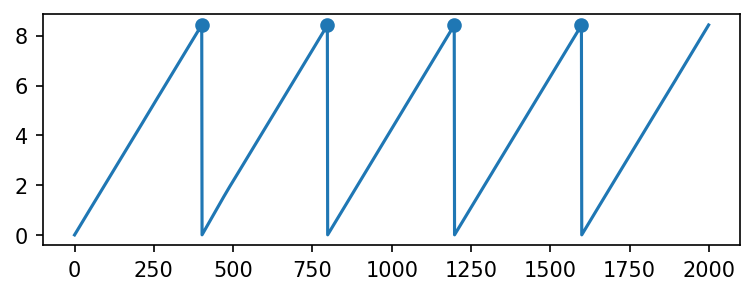

In [89]:
fig, ax = plt.subplots(figsize=(6,2))
fig.patch.set_visible(True)
ax.axis('on')
# ax = plt.axes(projection='3d')  
# ax.view_init(30,60)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

ax.plot(end_eff_data[:,0])
ax.scatter(peaks,end_eff_data[peaks,0])

demo_max=2
end_eff=['']*demo_max
rh     =['']*demo_max
lh     =['']*demo_max
joints =['']*demo_max

for i in range(0,demo_max):
    if i==0:
        end_eff[i] = end_eff_data[1:peaks[0],:]
        rh[i]      =      rh_data[1:peaks[0],:]
        lh[i]      =      lh_data[1:peaks[0],:]
        joints[i]  =   joint_data[1:peaks[0],:]
    else:
        end_eff[i] = end_eff_data[peaks[i-1]:peaks[i],:]
        rh[i]      =      rh_data[peaks[i-1]:peaks[0],:]
        lh[i]      =      lh_data[peaks[i-1]:peaks[0],:]
        joints[i]  =   joint_data[peaks[i-1]:peaks[0],:]


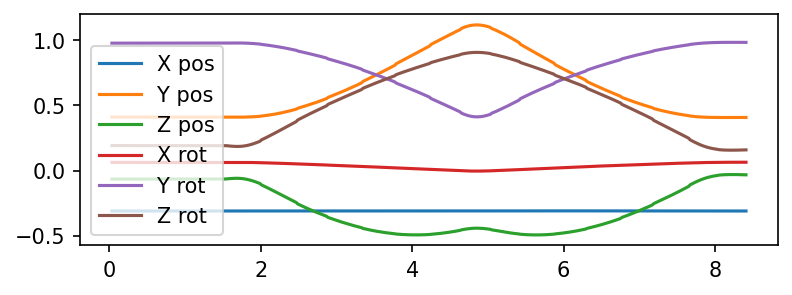

In [102]:
fig, ax = plt.subplots(figsize=(6,2))
fig.patch.set_visible(True)
ax.axis('on')
ax.plot(end_eff[0][:,0],end_eff[0][:,1],label="X pos")
ax.plot(end_eff[0][:,0],end_eff[0][:,2],label="Y pos")
ax.plot(end_eff[0][:,0],end_eff[0][:,3],label="Z pos")
ax.plot(end_eff[0][:,0],end_eff[0][:,4],label="X rot")
ax.plot(end_eff[0][:,0],end_eff[0][:,5],label="Y rot")
ax.plot(end_eff[0][:,0],end_eff[0][:,6],label="Z rot")

ax.legend()

NameError: name 'ja_data_aligned' is not defined

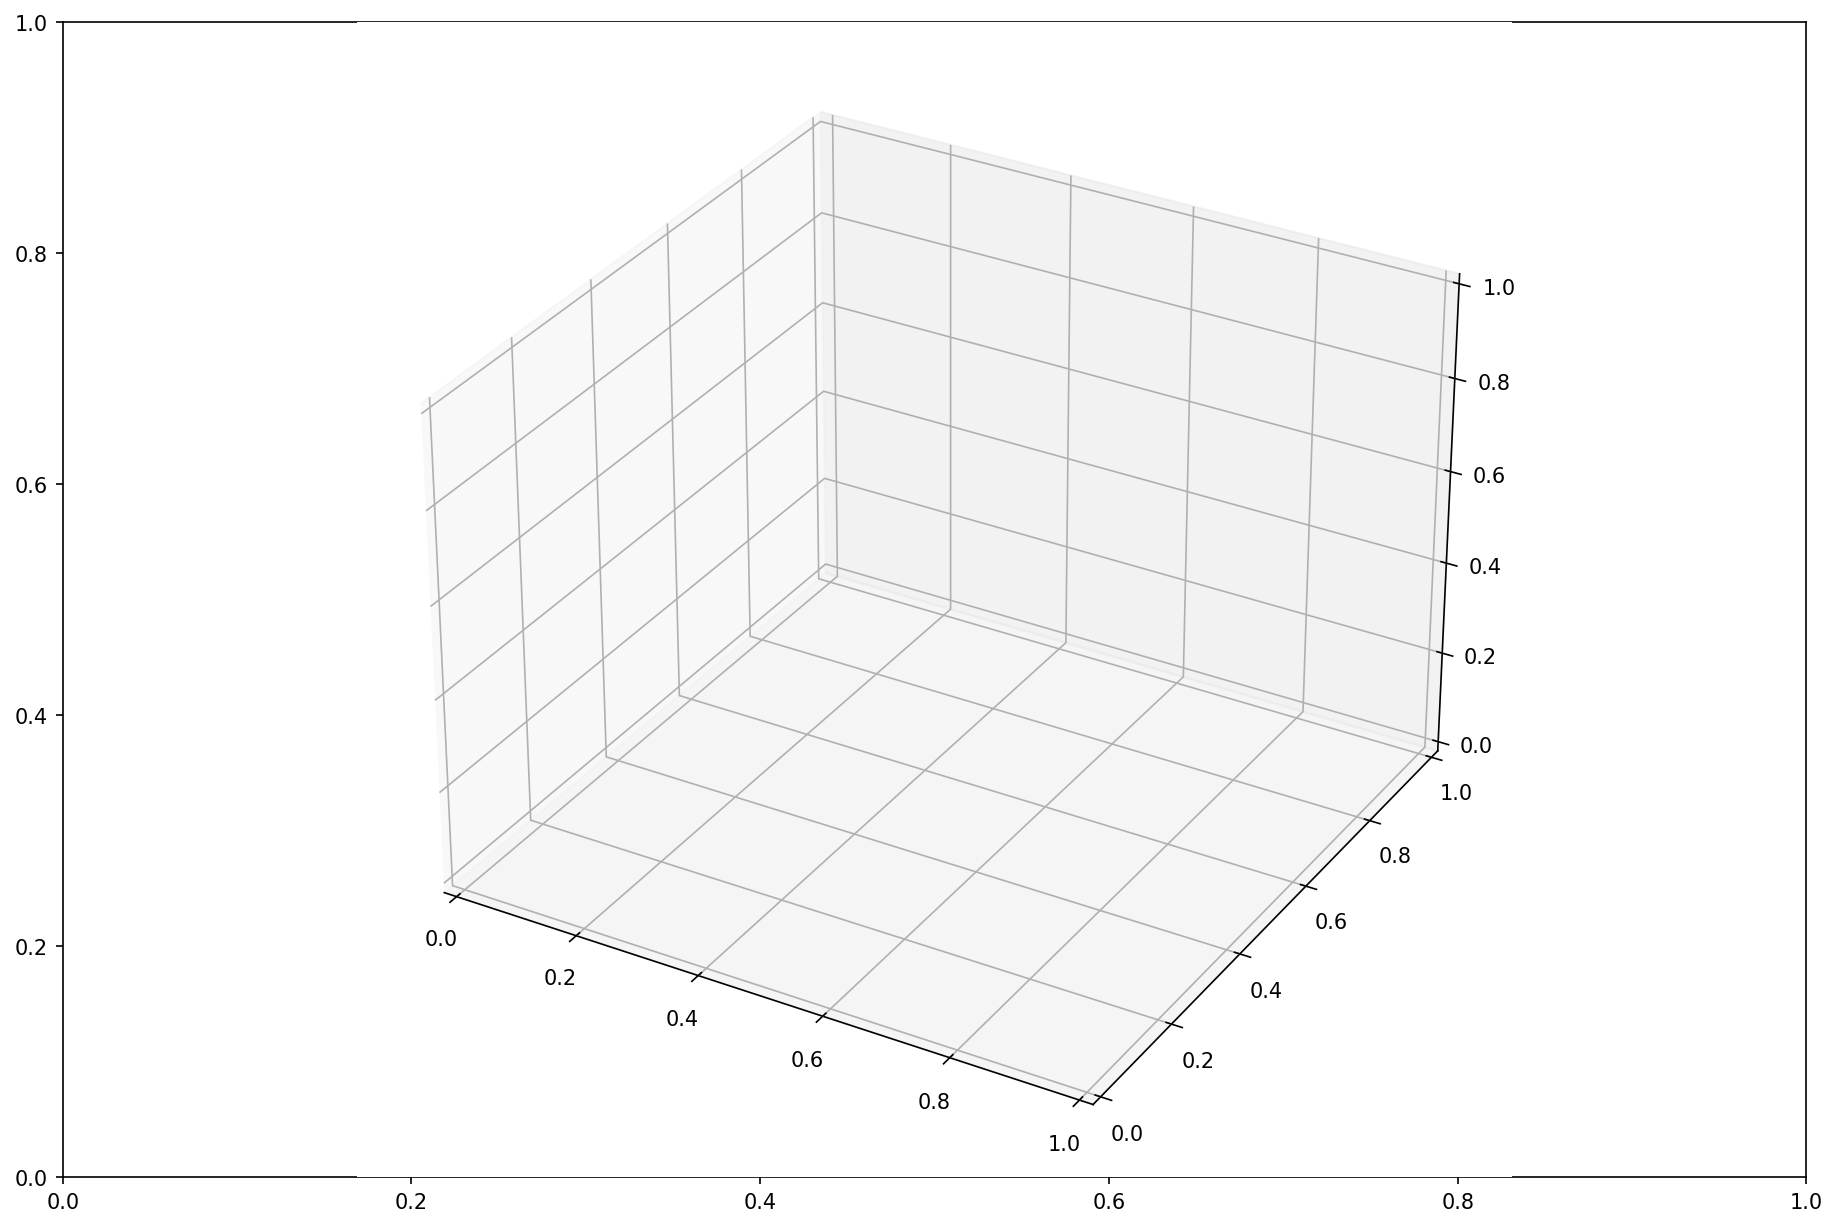

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.patch.set_visible(True)
ax.axis('on')

ax = plt.axes(projection='3d')

ax.scatter(ja_data_aligned[...,2], ja_data_aligned[...,3], ja_data_aligned[...,4], \
          c=time_ja_aligned/max(time_ja_aligned), cmap='Reds', label='Joint Angle Values')
ax.scatter(hand_data_aligned[...,0]   , -hand_data_aligned[...,2]   , hand_data_aligned[...,1]   , \
          c=time_hand_aligned/max(time_hand_aligned), cmap='Blues', label='Hand position')

for [map_x, map_y] in warp_path_ja: 
    ax.plot3D([ja_data_aligned[map_x].T[2], hand_data_aligned[map_y].T[0]], \
              [ja_data_aligned[map_x].T[3], -hand_data_aligned[map_y].T[2]],\
              [ja_data_aligned[map_x].T[4], hand_data_aligned[map_y].T[1]], \
              '--k', linewidth=0.2)
    
ax.set_xlabel('Horizontal position')
ax.set_ylabel('Forward/Back position')
ax.set_zlabel('Vertical position')

ax.set_title("DTW Alignment of Hand Position and First Three URDF Joint Angles", fontsize=10, fontweight="bold")


In [50]:
PID=1
gesture_num=1
demo_num = 1

end_eff_data, camera_data, rh_data, lh_data, joint_data = dtw_data_import(robot_name,end_eff_name, PID, gesture_num, demo_num)
# jointangle_data  = dtw_jointangles_import(gesture_num, demo_num)

hand_data[...,0]=hand_data[...,0]-min(hand_data[...,0])
joint_data[...,0]=joint_data[...,0]-min(joint_data[...,0])

dtw_distance, warp_path_ja = fastdtw(joint_data[...,0], hand_data[...,0], dist=euclidean) 

time_ja    = joint_data[...,0]
time_hand  = hand_data[...,0]

wp_size             = len(warp_path_ja)
time_ja_aligned     = np.zeros(wp_size)
time_hand_aligned   = np.zeros(wp_size)
ja_data_aligned     = np.zeros((wp_size,14))
hand_data_aligned   = np.zeros((wp_size,7))

for i, [map_x, map_y] in enumerate(warp_path_ja, start=0):   
    time_ja_aligned[i]   = time_ja[map_x]
    time_hand_aligned[i] = time_hand[map_y]
    ja_data_aligned[i]      = joint_data[map_x][:]
    hand_data_aligned[i]  = hand_data[map_y]
    
np.savez('ja_data_'+str(gesture_num)+'_'+str(demo_num),time_ja_aligned=time_ja_aligned, time_hand_aligned=time_hand_aligned,\
                hand_data_aligned=hand_data_aligned, ja_data_aligned=ja_data_aligned,gesture_num=gesture_num, demo_num=demo_num, warp_path=warp_path_ja)

ValueError: Input vector should be 1-D.

FileNotFoundError: [Errno 2] No such file or directory: 'data_PID0_Reachy_gesture_1_1.npz'

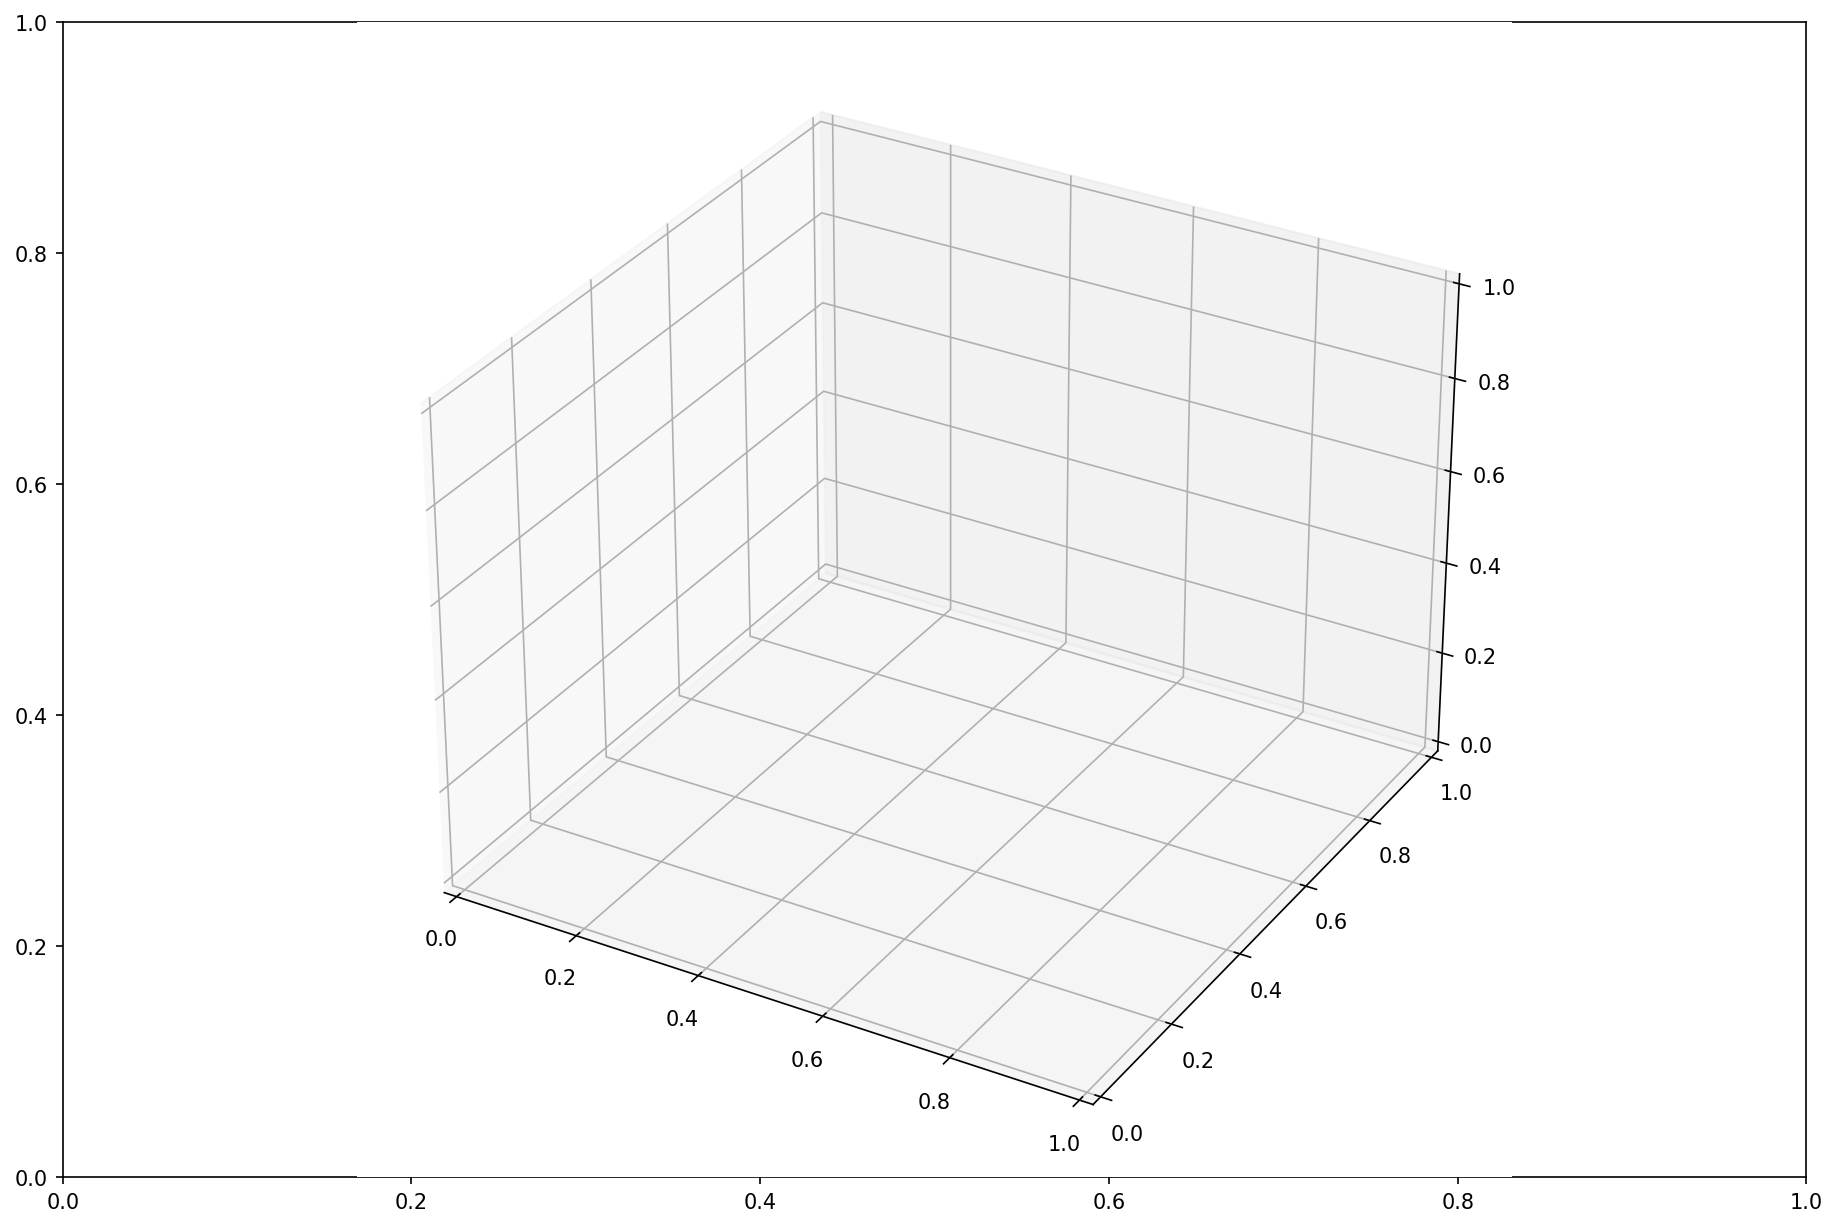

In [13]:
robot_name = "Reachy"
end_eff_name = "r_wrist2hand"

# robot_name = "j2s6s300"
# end_eff_name = "j2s6s300_end_effector"
PID = 0

for gesture_num in range(1,13):
#     print(gesture_num)
    fig, ax = plt.subplots(figsize=(15, 10))
    fig.patch.set_visible(True)
    ax.axis('on')

    ax = plt.axes(projection='3d')
    
    # for [map_x, map_y] in warp_path: 
    #     ax.plot3D([end_eff_pos_aligned[map_x].T[0], hand_pos_aligned[map_y].T[0]], \
    #               [end_eff_pos_aligned[map_x].T[2], -hand_pos_aligned[map_y].T[2]],\
    #               [end_eff_pos_aligned[map_x].T[1], hand_pos_aligned[map_y].T[1]], \
    #               '--k', linewidth=0.2)
   
    for demo_num in range(1,6):     
        data = np.load('data_PID'+str(PID)+"_"+str(robot_name)+"_gesture_"+str(gesture_num)+'_'+str(demo_num)+".npz")
        hand_pos_aligned = data['hand_pos_aligned'];
        end_eff_pos_aligned = data['end_eff_pos_aligned'];
        time_hand_aligned = data['time_hand_aligned']
        
        index = np.where(time_hand_aligned>time_hand_aligned[0]+1)[0][0]
        
        end_eff_pos_aligned = end_eff_pos_aligned - end_eff_pos_aligned[index];
        hand_pos_aligned = hand_pos_aligned - hand_pos_aligned[index];

        ax.scatter(end_eff_pos_aligned[...,0], end_eff_pos_aligned[...,2], end_eff_pos_aligned[...,1], \
                  c=1-time_hand_aligned/max(time_hand_aligned), cmap='Reds', label='Joint Angle Values')
        ax.scatter(hand_pos_aligned[...,0]   , -hand_pos_aligned[...,2]   , hand_pos_aligned[...,1]   , \
                  c=1-time_hand_aligned/max(time_hand_aligned), cmap='Blues', label='Hand position')

        print(gesture_num, demo_num)

    ax.set_xlabel('Horizontal position')
    ax.set_ylabel('Forward/Back position')
    ax.set_zlabel('Vertical position')
    ax.legend()

    ax.set_title("Raw RH Motion Data and URDF End-Effector Position", fontsize=20, fontweight="bold")
    plt.savefig('Raw_visuals_'+robot_name+'_gesture'+str(gesture_num)+'.png')
    plt.close('all')



In [28]:
#import cmasher as cmr

robot_name = "Reachy"
end_eff_name = "r_wrist2hand"
PID = 0

gesture_max = 13; #This stops the plots at 12, because gesture 13 only has 4 gestures (fix this in Unity)
cmap = plt.get_cmap('plasma')
#colors = cmr.take_cmap_colors('inferno', gesture_max)
slicedCM = cmap(np.linspace(0, 1, gesture_max)
c=slicedCM[Subjects.index(Subject)]


for gesture_num in range(1,13):
#     print(gesture_num)
    fig, ax = plt.subplots(figsize=(15, 10))
    fig.patch.set_visible(True)
    ax.axis('on')

    ax = plt.axes(projection='3d')
    
    # for [map_x, map_y] in warp_path: 
    #     ax.plot3D([end_eff_pos_aligned[map_x].T[0], hand_pos_aligned[map_y].T[0]], \
    #               [end_eff_pos_aligned[map_x].T[2], -hand_pos_aligned[map_y].T[2]],\
    #               [end_eff_pos_aligned[map_x].T[1], hand_pos_aligned[map_y].T[1]], \
    #               '--k', linewidth=0.2)
    
    for demo_num in range(1,6):     
        data = np.load('data_PID'+str(PID)+"_"+str(robot_name)+"_gesture_"+str(gesture_num)+'_'+str(demo_num)+".npz")
        hand_pos_aligned = data['hand_pos_aligned'];
        end_eff_pos_aligned = data['end_eff_pos_aligned'];
        time_hand_aligned = data['time_hand_aligned']
        
        index = np.where(time_hand_aligned>time_hand_aligned[0]+1)[0][0]
        
        end_eff_pos_aligned = end_eff_pos_aligned - end_eff_pos_aligned[index];
        hand_pos_aligned = hand_pos_aligned - hand_pos_aligned[index];

        ax.scatter(end_eff_pos_aligned[...,0], end_eff_pos_aligned[...,2], end_eff_pos_aligned[...,1], \
                  c=1-time_hand_aligned/max(time_hand_aligned), cmap='Reds', label='Joint Angle Values')
        ax.scatter(hand_pos_aligned[...,0]   , -hand_pos_aligned[...,2]   , hand_pos_aligned[...,1]   , \
                  c=1-time_hand_aligned/max(time_hand_aligned), cmap='Blues', label='Hand position')

#         print(gesture_num, demo_num)

    ax.set_xlabel('Horizontal position')
    ax.set_ylabel('Forward/Back position')
    ax.set_zlabel('Vertical position')
    ax.legend()

    ax.set_title("Raw RH Motion Data and URDF End-Effector Position", fontsize=20, fontweight="bold")
    plt.savefig('Raw_visuals_gesture'+str(gesture_num)+'.png')
    plt.close('all')

array([[ 0.00000e+00,  0.00000e+00,  0.00000e+00],
       [ 9.24000e-05,  9.32000e-05, -8.90000e-05],
       [ 1.62400e-04,  1.21400e-04, -2.12000e-04],
       ...,
       [ 4.93590e-03, -2.41021e-02,  3.27610e-02],
       [ 5.16050e-03, -2.47814e-02,  3.30610e-02],
       [ 5.28980e-03, -2.54068e-02,  3.33440e-02]])

In [12]:
rh_data

array([], dtype=float64)

In [48]:
np.where(time_hand_aligned>time_hand_aligned[0]+1)[0][0]

69